In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path = '/content/drive/MyDrive/Dataset/IRIS.csv'
dataset = pd.read_csv(path)
dataset.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,NaN,NaN,NaN,NaN
1,5.1,3.5,1.4,0.2,setosa
2,NaN,NaN,NaN,NaN,NaN
3,4.9,3.0,1.4,0.2,setosa
4,NaN,NaN,NaN,NaN,NaN


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 11.8+ KB


<ipython-input-3-574512f733b4>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True, cmap='Blues')


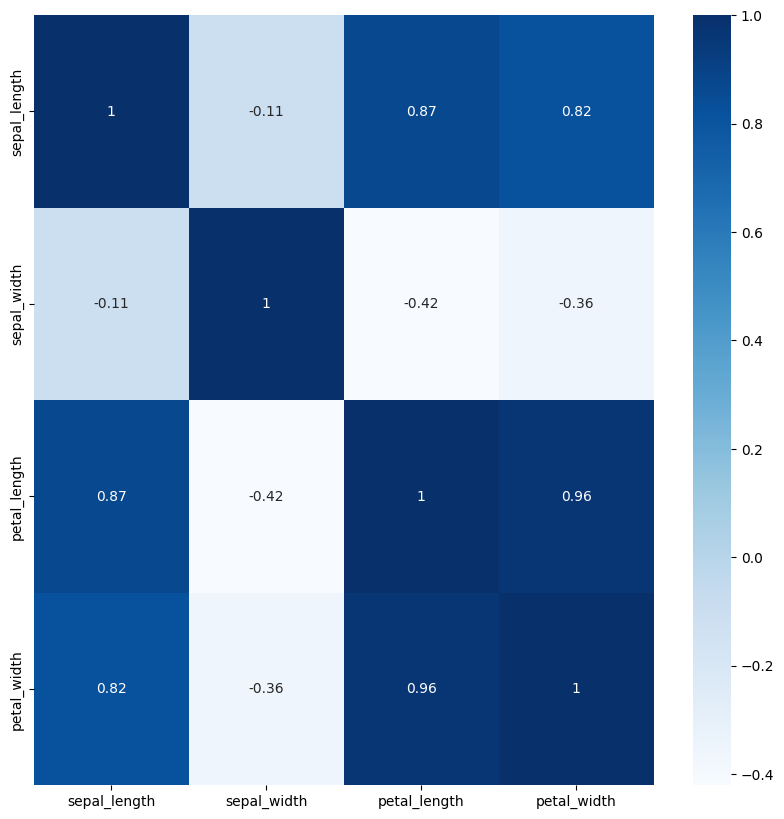

In [3]:
import seaborn as sns

plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), annot = True, cmap='Blues')
plt.show()

Tìm khoảng tin cậy

In [4]:
#Xử lý NaN
missing = dataset.isna().any()
missing
#Kết quả cho thấy dataset bị NaN ở các cột
dataset.dropna(inplace=True)
dataset.shape

(150, 5)

In [5]:
gantenhoa = {"setosa":0,"versicolor":1,"virginica":2}
dataset['species'] = dataset['species'].map(gantenhoa)

In [107]:
sum_hoa = dataset.sum()
print(sum_hoa)

Tongsohoa=dataset.species.sum()
print('Tổng số hoa',Tongsohoa)


sohoa_setosa = dataset.loc[dataset.species == 0]
sohoa_setosa = sohoa_setosa.iloc[: , -1]
print(len(sohoa_setosa))


sepal_length    876.5
sepal_width     458.1
petal_length    563.8
petal_width     179.8
species         150.0
dtype: float64
Tổng số hoa 150
50


In [108]:
TL_setosa = len(sohoa_setosa)/Tongsohoa
print(TL_setosa)

0.3333333333333333


In [109]:
from scipy import stats

confidence_level = 0.95

# Tính độ lệch chuẩn của tỷ lệ mẫu
std = np.sqrt((TL_setosa* (1 - TL_setosa)) /Tongsohoa)

# Tính giá trị Z ứng với độ tin cậy 95%
z_score = stats.norm.ppf(1 - confidence_level / 2)

# Tính khoảng tin cậy 95%
margin_of_error = z_score * std
lower_bound = TL_setosa - margin_of_error
upper_bound = TL_setosa + margin_of_error

print(f"Khoảng tin cậy 95%: ({lower_bound:.4f}, {upper_bound:.4f})")

Khoảng tin cậy 95%: (0.3309, 0.3357)


In [6]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [113]:
#Lấy độ dài và độ rộng của cánh hoa
X= dataset[['petal_length','petal_width']]
y =dataset['species']

# Cắt data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

#Train
train = LinearRegression()
train.fit(X_train , y_train)

#y dự đoán
y_dudoan = train.predict(X_test)
print(y_dudoan)

[ 1.20024711  0.07307341  2.27842601  1.33094435  1.33502281  0.0894139
  1.03281711  1.91088503  1.33094435  1.03689556  1.7393499  -0.10254017
 -0.06578074 -0.08212123  0.03223552  1.42896062  1.99663926  0.97971718
  1.2165876   1.95580137 -0.00452391  1.58415526  0.10983284  1.89862299
  2.00479617  1.93130397  1.76792575  2.07423658  0.01181658 -0.00452391]


In [115]:
#Đơn biến
X= dataset[['petal_length']]
y =dataset['species']

# Cắt data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

#Train
train = LinearRegression()
train.fit(X_train , y_train)

#y dự đoán
y_dudoan = train.predict(X_test)
print(y_dudoan)

[ 1.42048713  0.09764766  2.3905694   1.33229783  1.46458178  0.00945836
  0.93544599  1.59686572  1.33229783  1.06772994  1.59686572 -0.03463629
 -0.07873094  0.00945836  0.00945836  1.42048713  1.90552827  1.06772994
  1.33229783  1.81733897  0.05355301  1.50867643  0.05355301  1.81733897
  2.17009616  1.64096037  1.90552827  1.94962291 -0.03463629  0.05355301]


(-0.2, 2.1)

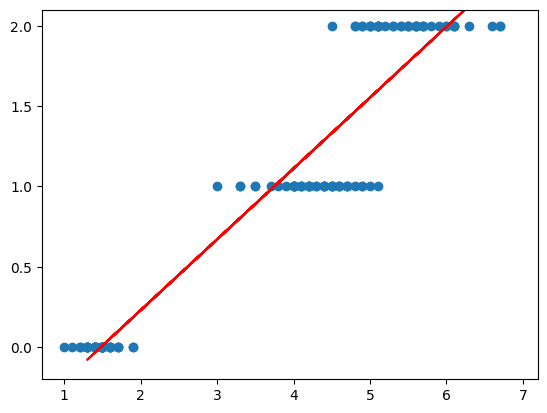

In [116]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_dudoan , c='r')
plt.ylim(-0.2 , 2.1)

In [9]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
#đa biến
X= dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y =dataset['species']

# Cắt data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state=42)

#Train
train = LinearRegression()
train.fit(X_train , y_train)

#y dự đoán
y_dudoan = train.predict(X_test)
print(y_dudoan)

[ 1.2305166  -0.04088817  2.22162345  1.34972015  1.28607917  0.02346565
  1.05796175  1.82557039  1.37219259  1.06898774  1.6997677  -0.0725704
 -0.15476151 -0.06513544 -0.02320247  1.39524413  1.99939235  1.04970178
  1.28040501  1.97315432  0.03134273  1.59775615  0.09419949  1.91821542
  1.83026281  1.88002641  1.78919243  2.03257165  0.0373074   0.02643301]


===============================================

In [11]:
path2 = '/content/drive/MyDrive/Dataset/Churn_Modelling.csv'
data = pd.read_csv(path2)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
#lấy các hàng cuối
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [15]:
#check missing value
data.isna().any(axis=1).sum()

0

Data Analysls

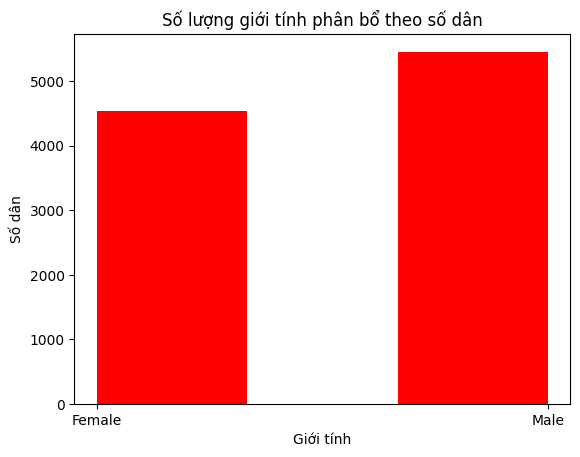

In [16]:
data['Gender'].value_counts()

plt.hist(x = data.Gender,bins = 3 , color = 'red')
plt.xlabel('Giới tính')
plt.ylabel('Số dân')
plt.title('Số lượng giới tính phân bổ theo số dân')
plt.show()

Biểu đồ cho ta thấy số lượng giới tính Nam nhiều hơn số lượng giới tính nữ

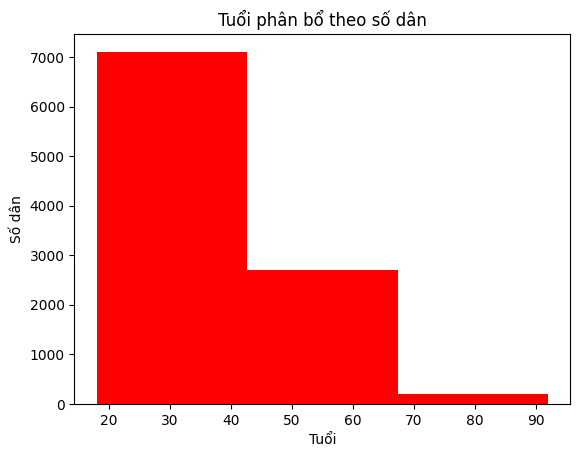

In [17]:
data['Age'].value_counts()

plt.hist(x = data.Age,bins = 3 , color = 'red')
plt.xlabel('Tuổi')
plt.ylabel('Số dân')
plt.title('Tuổi phân bổ theo số dân')
plt.show()

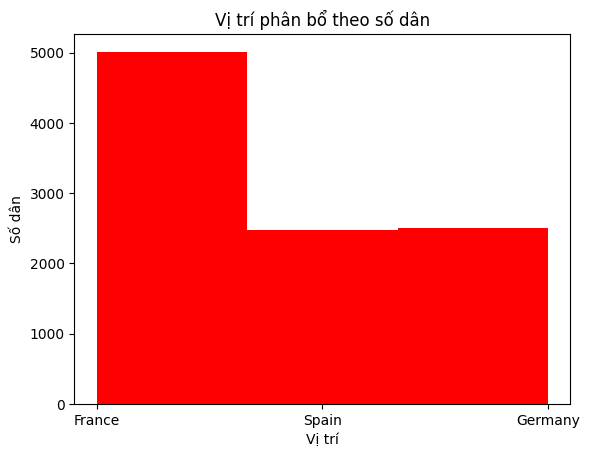

In [18]:
data['Geography'].value_counts()

plt.hist(x = data.Geography,bins = 3 , color = 'red')
plt.xlabel('Vị trí')
plt.ylabel('Số dân')
plt.title('Vị trí phân bổ theo số dân')
plt.show()

Theo biểu đồ ta thấy độ tuổi phân bố nhiều ở khoảng 20  tuổi đến 40 tuổi

Theo biểu đồ ta thấy có 3 địa điểm và phân bố nhiều nhất ở France khoảng 5000 ngìn dân

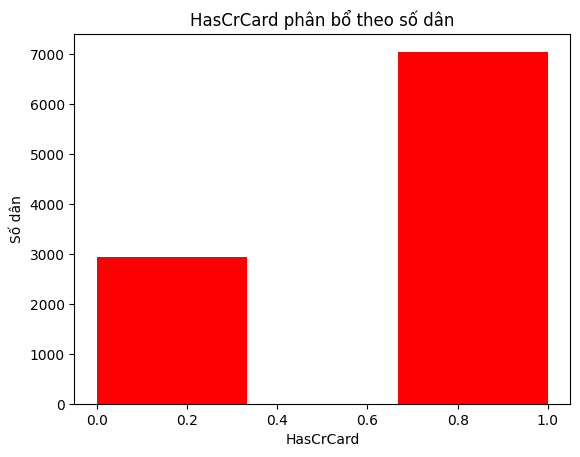

In [19]:
data['HasCrCard'].value_counts()

plt.hist(x = data.HasCrCard,bins = 3 , color = 'red')
plt.xlabel('HasCrCard')
plt.ylabel('Số dân')
plt.title('HasCrCard phân bổ theo số dân')
plt.show()

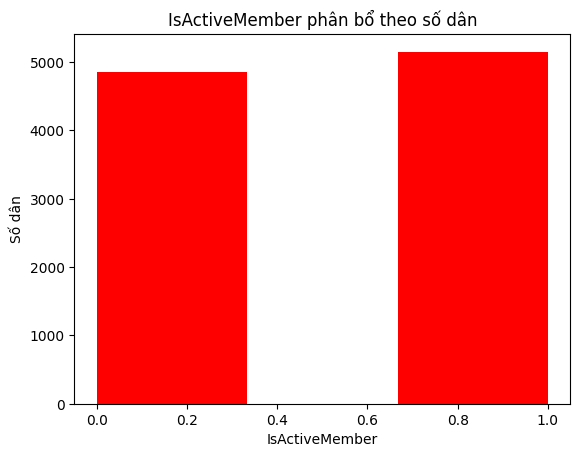

In [20]:
data['IsActiveMember'].value_counts()

plt.hist(x = data.IsActiveMember,bins = 3 , color = 'red')
plt.xlabel('IsActiveMember')
plt.ylabel('Số dân')
plt.title('IsActiveMember phân bổ theo số dân')
plt.show()

comparision between Geography ang Gender


<Axes: xlabel='Gender'>

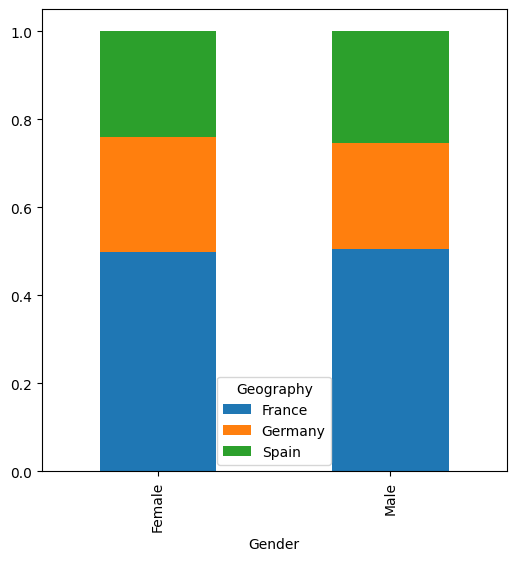

In [21]:
Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind='bar', stacked='True', figsize=(6,6))

comparision between Geography and carf holders

<Axes: xlabel='HasCrCard'>

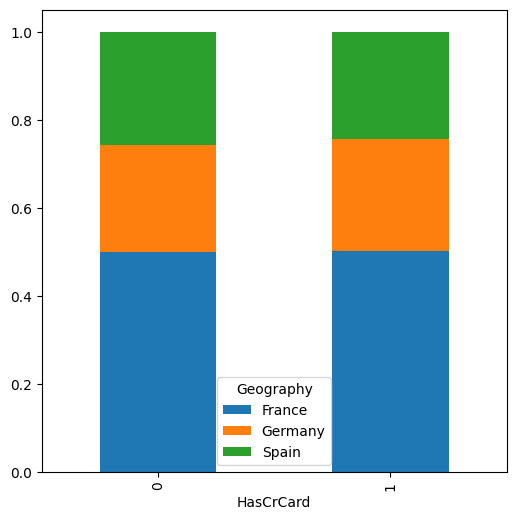

In [22]:
HasCrCard = pd.crosstab(data['HasCrCard'],data['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind='bar', stacked='True', figsize=(6,6))

comparision of active member in differnt geographies

<Axes: xlabel='IsActiveMember'>

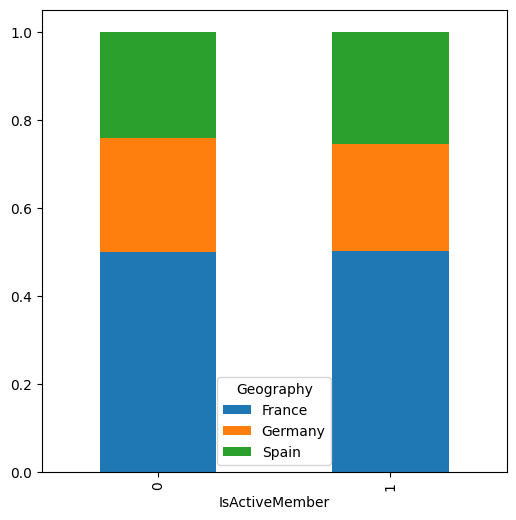

In [23]:
IsActiveMember= pd.crosstab(data['IsActiveMember'],data['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind='bar', stacked='True', figsize=(6,6))

comparing ages in different geographies

<Axes: xlabel='Age'>

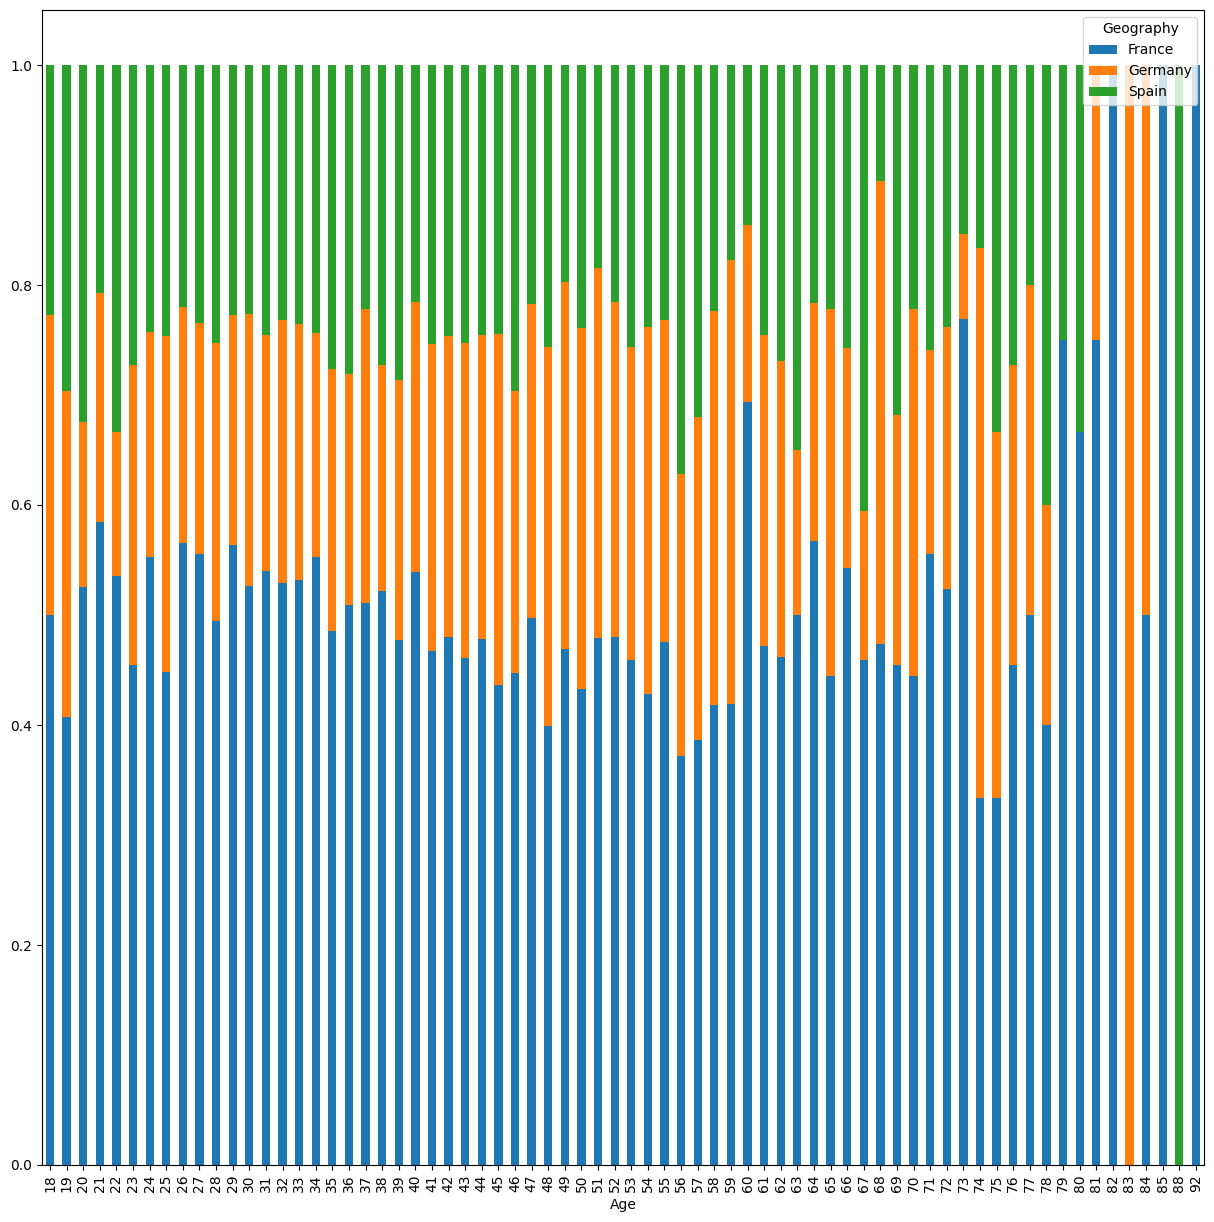

In [24]:
Age = pd.crosstab(data['Age'], data['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (15,15))

 calculating total balance in france, germany and spain

In [25]:
total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()
print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


plotting a pie chart

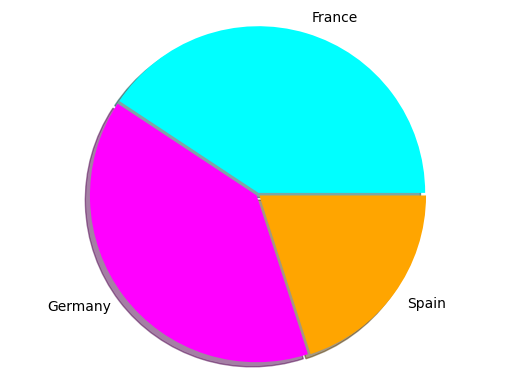

In [26]:
labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes = [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]
plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)
plt.axis('equal')
plt.show()

Data Prepocessing

In [27]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
data = data.drop(['CustomerId','Surname','RowNumber'], axis = 1)

In [29]:
data.shape

(10000, 11)

In [30]:
X1 = data.iloc[: , 0:10 ]
y1 = data.iloc[: ,10 ]

In [31]:
#One Hot Encoding
X1 = pd.get_dummies(X1)
X1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [32]:
#cat data
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1 , test_size = 0.2 , random_state=0)

Feature Scaling

 Only on Independent Variable to convert them into values ranging from -1 to +1

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.fit_transform(X_test1)
X_train1 = pd.DataFrame(X_train1)
X_train1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-1.014607,-0.569844,1.743090,1.091687,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,-1.014607,1.754865,-0.573694,-0.916013,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,0.985604,-0.569844,-0.573694,1.091687,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-1.014607,-0.569844,1.743090,-0.916013,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-1.014607,-0.569844,1.743090,1.091687,-1.091687


Modelling

In [34]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train1, y_train1)
y_pred1 = model.predict(X_test1)
print("Training Accuracy :", model.score(X_train1, y_train1))
print("Testing Accuaracy :", model.score(X_test1, y_test1))
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

Training Accuracy : 1.0
Testing Accuaracy : 0.804
[[1376  219]
 [ 173  232]]


Số 175 là True Negatives (TN), tức là số lượng trường hợp mô hình dự đoán đúng là negative khi thực tế cũng là negative.

Số 573 là False Positives (FP), tức là số lượng trường hợp mô hình dự đoán sai là positive khi thực tế là negative.

Số 406 là False Negatives (FN), tức là số lượng trường hợp mô hình dự đoán sai là negative khi thực tế là positive.

Số 1346 là True Positives (TP), tức là số lượng trường hợp mô hình dự đoán đúng là positive khi thực tế cũng là positive.

RandomForestClassifier là một mô hình máy học thuộc loại ensemble learning, chủ yếu được sử dụng cho các tác vụ phân loại (classification) và regression. Nó là một loại Decision Tree Ensemble Model.

In [35]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train1, y_train1)
y_pred2 = model.predict(X_test1)
print("Training Accuracy :", model.score(X_train1, y_train1))
print("Testing Accuracy :", model.score(X_test1, y_test1))
cm = confusion_matrix(y_test1, y_pred2)
print(cm)

# k fold cross validatio
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = model, X = X_train1, y = y_train1, cv = 10)
print(cvs)
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

Training Accuracy : 1.0
Testing Accuracy : 0.869
[[1534   61]
 [ 201  204]]
[0.87    0.84625 0.87375 0.8675  0.85375 0.84875 0.86375 0.84375 0.85375
 0.87   ]
Mean Accuracy : 0.8591249999999999
Variance : 0.010533428928891116


cross_val_score là một hàm trong thư viện scikit-learn của Python, được sử dụng để thực hiện cross-validation trên mô hình máy học. Cross-validation là một kỹ thuật đánh giá hiệu suất của mô hình trên dữ liệu kiểm tra mà mô hình chưa từng thấy trong quá trình huấn luyện

In [36]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)
print("Training Accuracy :", model.score(X_train1, y_train1))
print("Testing Accuracy :", model.score(X_test1, y_test1))
cm = confusion_matrix(y_test1, y_pred)
print(cm)

Training Accuracy : 0.8085
Testing Accuracy : 0.814
[[1540   55]
 [ 317   88]]


Support Vector Machine (SVM) là một mô hình máy học thuộc lớp các mô hình phân loại và hồi quy. Mục tiêu chính của SVM là tìm ra ranh giới phân chia tốt nhất giữa các lớp của dữ liệu.

In [37]:
#Support Vector Machine

from sklearn.svm import SVC

model = SVC()
model.fit(X_train1,y_train1)
y_dudoan = model.predict(X_test1)

print("Training Accuracy :", model.score(X_train1, y_train1))
print("Testing Accuracy :", model.score(X_test1, y_test1))
cm = confusion_matrix(y_test1, y_dudoan)
print(cm)

# k fold cross validatio
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = model, X = X_train1, y = y_train1, cv = 10)
print(cvs)

print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())



Training Accuracy : 0.864125
Testing Accuracy : 0.864
[[1563   32]
 [ 240  165]]
[0.86125 0.84875 0.86625 0.8575  0.84625 0.8425  0.855   0.84625 0.83375
 0.855  ]
Mean Accuracy : 0.85125
Variance : 0.00911729126440523


Multi-Layer Perceptron (MLP) là một dạng của mạng nơ-ron truyền thẳng (feedforward neural network) và là một trong những kiểu mô hình phổ biến trong deep learning. MLP được cấu tạo từ nhiều tầng nơ-ron (layers) và có khả năng học các biểu diễn phức tạp của dữ liệu thông qua quá trình huấn luyện.

In [38]:
#MLPClassifier

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), activation ='relu',solver = 'adam', max_iter = 50)

model.fit(X_train1, y_train1)
y_pred = model.predict(X_test1)
print("Training Accuracy :", model.score(X_train1, y_train1))
print("Testing Accuracy :", model.score(X_test1, y_test1))
cm = confusion_matrix(y_test1, y_pred)
print(cm)

Training Accuracy : 0.887625
Testing Accuracy : 0.858
[[1508   87]
 [ 197  208]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer_sizes=(100, 100): Đây là cấu trúc của các tầng ẩn. Trong trường hợp này, có hai tầng ẩn, mỗi tầng có 100 nơ-ron.

activation='relu': Hàm kích hoạt được sử dụng trong các tầng ẩn là Rectified Linear Unit (ReLU), một hàm kích hoạt phổ biến trong deep learning.

solver='adam': Adam là một phương pháp tối ưu hóa thường được sử dụng để điều chỉnh trọng số của mô hình.

max_iter=50: Số vòng lặp tối đa cho quá trình huấn luyện. Trong trường hợp này, mô hình sẽ thực hiện tối đa 50 vòng lặp.

Artificial Neural Networks (ANNs), hay mạng nơ-ron nhân tạo, là một dạng của mô hình máy học được lấy cảm hứng từ cách mà não người hoạt động. Mạng nơ-ron nhân tạo có khả năng học từ dữ liệu và thực hiện các nhiệm vụ như phân loại, dự đoán, và nhận dạng mẫu

In [39]:
#Aritificial Neural Networks

from keras.models import Sequential
from keras.layers import Dense

# creating the model
model = Sequential()
# first hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
# second hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# third hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# fourth hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# fifth hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
# output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train1, y_train1 , batch_size = 10 , epochs = 50)

Epoch 1/50
800/800 [==============================] - 9s 3ms/step - loss: 0.4845 - accuracy: 0.7960
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4299 - accuracy: 0.7960
Epoch 3/50
800/800 [==============================] - 4s 5ms/step - loss: 0.4239 - accuracy: 0.8080
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4197 - accuracy: 0.8223
Epoch 5/50
800/800 [==============================] - 4s 5ms/step - loss: 0.4175 - accuracy: 0.8265
Epoch 6/50
800/800 [==============================] - 4s 5ms/step - loss: 0.4155 - accuracy: 0.8299
Epoch 7/50
800/800 [==============================] - 4s 4ms/step - loss: 0.4141 - accuracy: 0.8316
Epoch 8/50
800/800 [==============================] - 4s 5ms/step - loss: 0.4117 - accuracy: 0.8311
Epoch 9/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4113 - accuracy: 0.8331
Epoch 10/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4100 - accuracy: 0.8329

output_dim=8: Đây là số lượng nơ-ron trong lớp. Trong trường hợp này, có 8 nơ-ron.

init='uniform': Phương thức khởi tạo trọng số. Trong trường hợp này, trọng số được khởi tạo theo phân phối đều (uniform).

activation='relu': Hàm kích hoạt cho các nơ-ron trong lớp. Trong trường hợp này, bạn đang sử dụng Rectified Linear Unit (ReLU).

input_dim=14: Số lượng đặc trưng đầu vào cho lớp này. Trong trường hợp này, có 14 đặc trưng đầu vào.

In [40]:
from keras.layers import Dropout
model = Sequential()
# first hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dropout(0.5))
# second hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train1, y_train1, epochs=50, batch_size = 10)

Epoch 1/50
800/800 [==============================] - 10s 5ms/step - loss: 0.5204 - accuracy: 0.7956
Epoch 2/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4679 - accuracy: 0.7960
Epoch 3/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4643 - accuracy: 0.7960
Epoch 4/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4555 - accuracy: 0.7960
Epoch 5/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4598 - accuracy: 0.7960
Epoch 6/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4544 - accuracy: 0.7960
Epoch 7/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4488 - accuracy: 0.7960
Epoch 8/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4585 - accuracy: 0.7960
Epoch 9/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4534 - accuracy: 0.7960
Epoch 10/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4551 - accuracy: 0.796

In [59]:
# creating the model
model1 = Sequential()
# first hidden layer
model1.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model1.add(Dropout(0.1))
# second hidden layer
model1.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model1.add(Dropout(0.1))
# output layer
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.fit(X_train1, y_train1, batch_size = 10, epochs = 50)

Epoch 1/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4730 - accuracy: 0.7960
Epoch 2/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4325 - accuracy: 0.7960
Epoch 3/50
800/800 [==============================] - 3s 4ms/step - loss: 0.4286 - accuracy: 0.7960
Epoch 4/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4255 - accuracy: 0.8119
Epoch 5/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4242 - accuracy: 0.8231
Epoch 6/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4201 - accuracy: 0.8303
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4229 - accuracy: 0.8281
Epoch 8/50
800/800 [==============================] - 5s 7ms/step - loss: 0.4220 - accuracy: 0.8295
Epoch 9/50
800/800 [==============================] - 6s 8ms/step - loss: 0.4210 - accuracy: 0.8296
Epoch 10/50
800/800 [==============================] - 5s 6ms/step - loss: 0.4199 - accuracy: 0.8313

predicting if the costumer having following information will leave the bank or not ?


Geography : france


Age = 50


Credit score = 850


Tenure = 4


Balance = 150000


Number of Products = 5


Gender = Female


Has Credit Card = yes


Is Active Member = yes


Estimated Salary = 85000

In [75]:
#test
x = np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1,0,0,0,0]])
y_dudoan = model1.predict(sc.transform(x))
y_dudoan= (y_dudoan > 0.5 )
print(y_dudoan)

1/1 [==============================] - 0s 25ms/step
[[False]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
!pip install scikeras

In [78]:
from tensorflow import keras
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Dense
from keras.models import Sequential
def build_classifier():
  # creating the model
  model2 = Sequential()
  # first hidden layer
  model2.add(Dense(units= 8, kernel_initializer  = 'uniform', activation = 'relu', input_dim = 13))
  # second hidden layer
  model2.add(Dense(units = 8, kernel_initializer  = 'uniform', activation = 'relu'))
  # output layer
  model2.add(Dense(units = 1, kernel_initializer  = 'uniform', activation = 'sigmoid'))
  # Compiling the NN
  # binary_crossentropy loss function used when a binary output is expected
  model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model2




In [84]:
model2 = KerasClassifier(build_fn = build_classifier, batch_size = 100, epochs = 5)
accuracies = cross_val_score(estimator = model2, X = X_train1, y = y_train1, cv = 10 ,n_jobs = 1)

print("Accuracies :", accuracies)
print("Mean Accuracy :", accuracies.mean())
print("Variance :", accuracies.std())

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 2s 6ms/step - loss: 0.6706 - accuracy: 0.7954
Epoch 2/5
72/72 [==============================] - 0s 6ms/step - loss: 0.5427 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 6ms/step - loss: 0.4513 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 5ms/step - loss: 0.4402 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 1s 4ms/step - loss: 0.6728 - accuracy: 0.7960
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.5504 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4403 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
72/72 [==============================] - 1s 3ms/step - loss: 0.6760 - accuracy: 0.7918
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.5778 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4401 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 1s 3ms/step - loss: 0.6756 - accuracy: 0.7917
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4580 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 1s 3ms/step - loss: 0.6724 - accuracy: 0.7925
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 2s 4ms/step - loss: 0.6756 - accuracy: 0.7929
Epoch 2/5
72/72 [==============================] - 0s 5ms/step - loss: 0.5681 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 4ms/step - loss: 0.4395 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 2s 5ms/step - loss: 0.6724 - accuracy: 0.7940
Epoch 2/5
72/72 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 1s 3ms/step - loss: 0.6760 - accuracy: 0.7943
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.5790 - accuracy: 0.7960
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7960
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7960
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 1s 3ms/step - loss: 0.6736 - accuracy: 0.7935
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.7961
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7961
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.7961
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


72/72 [==============================] - 1s 3ms/step - loss: 0.6731 - accuracy: 0.7926
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.5536 - accuracy: 0.7961
Epoch 3/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4552 - accuracy: 0.7961
Epoch 4/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7961
Epoch 5/5
8/8 [==============================] - 0s 2ms/step
Accuracies : [0.79625 0.79625 0.79625 0.79625 0.79625 0.79625 0.79625 0.79625 0.795
 0.795  ]
Mean Accuracy : 0.796
Variance : 0.0004999999999999894
